# Vision por Computadora con Computer Vision

## Instalamos la biblioteca de Computer Vision

In [1]:
pip install --upgrade azure-cognitiveservices-vision-computervision

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 84 kB 1.3 MB/s 
     |████████████████████████████████| 61 kB 163 kB/s 
     |████████████████████████████████| 45 kB 1.9 MB/s 
     |████████████████████████████████| 156 kB 18.8 MB/s 
     |████████████████████████████████| 133 kB 39.9 MB/s 
     |████████████████████████████████| 58 kB 2.0 MB/s 
     |████████████████████████████████| 127 kB 24.8 MB/s 
     |████████████████████████████████| 147 kB 40.7 MB/s 
Cleaning up...
You should consider upgrading via the '/opt/python/latest/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Importamos las Bibliotecas de Cliente, Credenciales, Visual Features Types, Operation Status

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

## Configuramos nuestras credenciales de Azure 

* Creamos el servicio de Computer Vision
* Revisamos las Claves, Endpoint y Region

In [4]:
key = '4e3a7b86a81c4b2ab0ef68f776ed2409'
endpoint= 'https://demo-vision-nube.cognitiveservices.azure.com/'

## Autenticamos el cliente

In [5]:
client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(key))

## Agregamos la imagen que queremos analizar

Al igual que con el Big Ben revisamos lo que tenemos disponible en el objeto describe

![](https://images.unsplash.com/photo-1600821338897-eaadbb51b1e9?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80)

In [5]:
imagen = 'https://images.unsplash.com/photo-1600821338897-eaadbb51b1e9?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80'
describe = client.describe_image(imagen)
dir(describe)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attribute_map',
 '_classify',
 '_create_xml_node',
 '_flatten_subtype',
 '_get_rest_key_parts',
 '_infer_class_models',
 '_subtype_map',
 '_validation',
 'additional_properties',
 'as_dict',
 'captions',
 'deserialize',
 'enable_additional_properties_sending',
 'from_dict',
 'is_xml_model',
 'metadata',
 'request_id',
 'serialize',
 'tags',
 'validate']

## Obtenemos las etiquetas de nuestra imagen

In [6]:
describe.tags

['sky', 'outdoor', 'city', 'river']

## Obtenemos la descripción de la imagen misma

In [7]:
for caption in describe.captions:
  print(caption.text, caption.confidence)

a city skyline with a body of water in the foreground 0.5147209763526917


## Detectamos los objetos que se encuentran en la imagen y los encerramos en un rectangulo

In [8]:
detect = client.detect_objects(imagen)
for objetos in detect.objects:
  print(objetos.object_property, objetos.rectangle)

building {'additional_properties': {}, 'x': 107, 'y': 540, 'w': 87, 'h': 207}
building {'additional_properties': {}, 'x': 575, 'y': 457, 'w': 82, 'h': 313}
building {'additional_properties': {}, 'x': 428, 'y': 563, 'w': 93, 'h': 214}
building {'additional_properties': {}, 'x': 1110, 'y': 553, 'w': 82, 'h': 244}
building {'additional_properties': {}, 'x': 1211, 'y': 587, 'w': 72, 'h': 191}
building {'additional_properties': {}, 'x': 870, 'y': 161, 'w': 149, 'h': 600}
building {'additional_properties': {}, 'x': 692, 'y': 377, 'w': 118, 'h': 375}
building {'additional_properties': {}, 'x': 403, 'y': 449, 'w': 137, 'h': 319}
building {'additional_properties': {}, 'x': 829, 'y': 457, 'w': 133, 'h': 305}
building {'additional_properties': {}, 'x': 966, 'y': 547, 'w': 142, 'h': 243}


## Revisamos si podemos identificar de que edificios se trata

In [10]:
landmark = client.analyze_image_by_domain("landmarks", imagen)
landmark.result

{'landmarks': []}

## Identificamos la categoria en la que clasifica la imagen

In [11]:
analyze = client.analyze_image(imagen)
for category in analyze.categories:
    print(category)

{'additional_properties': {}, 'name': 'building_', 'score': 0.28515625, 'detail': None}
{'additional_properties': {}, 'name': 'outdoor_', 'score': 0.0078125, 'detail': None}
{'additional_properties': {}, 'name': 'outdoor_city', 'score': 0.3515625, 'detail': None}


# Procesando una imagen

![](./images/house.jpg)

In [6]:
with open ('./images/house.jpg', 'rb') as image_demo:
  image_analysis = client.analyze_image_in_stream(
      image= image_demo,
      visual_features = [
          VisualFeatureTypes.image_type,
          VisualFeatureTypes.faces,
          VisualFeatureTypes.categories,
          VisualFeatureTypes.color,
          VisualFeatureTypes.tags,
          VisualFeatureTypes.description
      ]
  )

In [7]:
print('Esta imagen puede ser descrita como: {}\n'.format(image_analysis.description.captions[0].text))

Esta imagen puede ser descrita como: a house with a flag on the front



In [9]:
print('Las etiquetas asociadas con la imagen son: \nTag\t\tConfidence')
for tag in image_analysis.tags:
  print('{}\t\t{}'.format(tag.name, tag.confidence))

Las etiquetas asociadas con la imagen son: 
Tag		Confidence
grass		0.9999992847442627
outdoor		0.9998296499252319
sky		0.9949862957000732
porch		0.989298939704895
house		0.9892969131469727
window		0.9813238382339478
building		0.9665317535400391
plant		0.9509046077728271
property		0.8996356725692749
home		0.8868321180343628
real estate		0.8656928539276123
green		0.850706160068512
lawn		0.81634122133255
siding		0.7974152565002441
yard		0.7873743772506714
door		0.7599790692329407
cottage		0.6932566165924072
tree		0.66106116771698
backyard		0.6113648414611816
farmhouse		0.53863126039505
residential		0.41710036993026733
grassy		0.4039033055305481


In [10]:
print('\nLos colores dominantes en la imagen son: {}'.format(
    image_analysis.color.dominant_colors
))


Los colores dominantes en la imagen son: ['Green', 'White']


# Leyendo el Texto de una Imagen con OCR

## Forma 1 con el SDK de Python
## Analizando la imagen
* Declaramos una imagen y asignamos una url
* La imagen es enviada a los servicios cognitivos de Computer Vision para que la lea
* Los resultados de lo que lee los guardamos en resultsI

In [13]:
image_text = 'https://raw.githubusercontent.com/FernandaOchoa/python101Nubers/main/ComputerVision/images/make_things_happen.jpg'
resultsI = client.read(image_text,  raw=True)

## Obtenemos la localización para saber el Id de la Operación

In [14]:
opLocRemote = resultsI.headers['Operation-Location']
operation_id = opLocRemote.split('/')[-1]

## Mostramos el texto que encontró al leerlo línea por línea

In [15]:
while True:
    results = client.get_read_result(operation_id)
    if results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

if results.status == OperationStatusCodes.succeeded:
    for text_result in results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)

make
[36.0, 132.0, 190.0, 128.0, 187.0, 191.0, 37.0, 189.0]
things
[106.0, 196.0, 274.0, 205.0, 272.0, 251.0, 103.0, 240.0]
happen
[206.0, 250.0, 411.0, 257.0, 408.0, 326.0, 204.0, 318.0]


## Forma 2 por medio de API REST y Dibujando sobre la imagen

Importamos las bibliotecas necesarias para trabajar con REST

In [20]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.6 MB 13.3 MB/s 
     |████████████████████████████████| 14.5 MB 27.5 MB/s 
     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 2.2 MB 35.9 MB/s 
     |████████████████████████████████| 92 kB 33 kB/s 
Cleaning up...
You should consider upgrading via the '/opt/python/latest/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import requests
import json
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

## Declaramos una imagen y asignamos una url
* Por lo que para hacerlo debemos construir la URL con los siguientes datos

In [24]:
ocr_url = endpoint + '/vision/v3.1/read/analyze'

image_url = 'https://raw.githubusercontent.com/FernandaOchoa/python101Nubers/main/ComputerVision/images/make_things_happen.jpg'

headers = {'Ocp-Apim-Subscription-Key': key}
data = {'url': image_url}

## Obtenemo la Localización para saber el Id de la Operación 

In [25]:
response = requests.post(
    ocr_url, headers=headers, json=data)
response.raise_for_status()
operation_url = response.headers["Operation-Location"]

## Mandamos la imagen a que se analice
* La imagen es enviada a los servicios cognitivos de Computer Vision para que la lea
* Obtenemos la respuesta en formato JSON

In [26]:
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    
    print(json.dumps(analysis, indent=4))

    time.sleep(1)
    if ("analyzeResult" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'failed'):
        poll = False

polygons = []
if ("analyzeResult" in analysis):
    # Extraemos el texto reconocido, con los bounding boxes
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["analyzeResult"]["readResults"][0]["lines"]]

{
    "status": "succeeded",
    "createdDateTime": "2020-10-15T01:56:27Z",
    "lastUpdatedDateTime": "2020-10-15T01:56:27Z",
    "analyzeResult": {
        "version": "3.0.0",
        "readResults": [
            {
                "page": 1,
                "angle": 2.1007,
                "width": 450,
                "height": 450,
                "unit": "pixel",
                "lines": [
                    {
                        "boundingBox": [
                            36,
                            132,
                            190,
                            128,
                            187,
                            191,
                            37,
                            189
                        ],
                        "text": "make",
                        "words": [
                            {
                                "boundingBox": [
                                    36,
                                    128,
                

## Mostramos los resultados

* Leemos el texto linea por linea en la imagen
* Dibujamos una capa con rectangulos
* Agregamos en los rectangulos el texto que reconocio
* Lo mostra

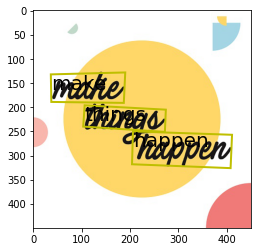

In [27]:
# Muestra una capa sobre el texto con el texto reconocido.
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
plt.show()